The script based on https://github.com/moondra2017/Computer-Vision

 Key differences:
 - works on standard Python libraries, NumPy and Pillow
 - modified to meet the requirements of Rails Reactor MLSchool test task
 ---
 
 

**Description:** 

This is a console tool made for finding duplicates and similar images in user provided folder.



**Usage:** 

arguments:
 
  -h, --help            show this help message and exit
  
  --path PATH           folder with images


<p style="text-align: center;"> Work flow </p>


![](WorkFlow.png)

# Results analysis and parameters optimization

Test runs with different settings showed that there are three most influential parameters in the script:


*   Common height and width all images transformed to
*   Similarity threshold (e. g. hamming distance threshold)
*   Resize algorithm 

Drastically accuracy improving is spotted on **common height and width** from 10x10 to 25x25 pixels, descending below this level leads to false positive results, everything above - less accurate in finding similar images.

Most of images in the data set have **aspect ration** from 1.3 to 1.6, maintaining **aspect ration = 1.5** after resizing slightly increases accuracy. 




**Similarity threshold** is calculated separately for every common height and width and depends on minimal distance between non similar pairs of images. 

The idea behind similarity threshold is better illustrated on figures below.

**Resize algorithms** significantly influence results. 

Best result showed pil.Image.resize(resample = 2 and resample = 5 ). Resample = 2 was chosen for better computational efficiency. 

Even though np.resize() does not suited for image resizing, this one works well with some specific image modifications.

Some potential improving in accuracy may be achieved by using both of this algorithms, but that slows down the script by 3-4 times. 

Considering the script already finds every similarities in test data set further computational complication may be unjustified.

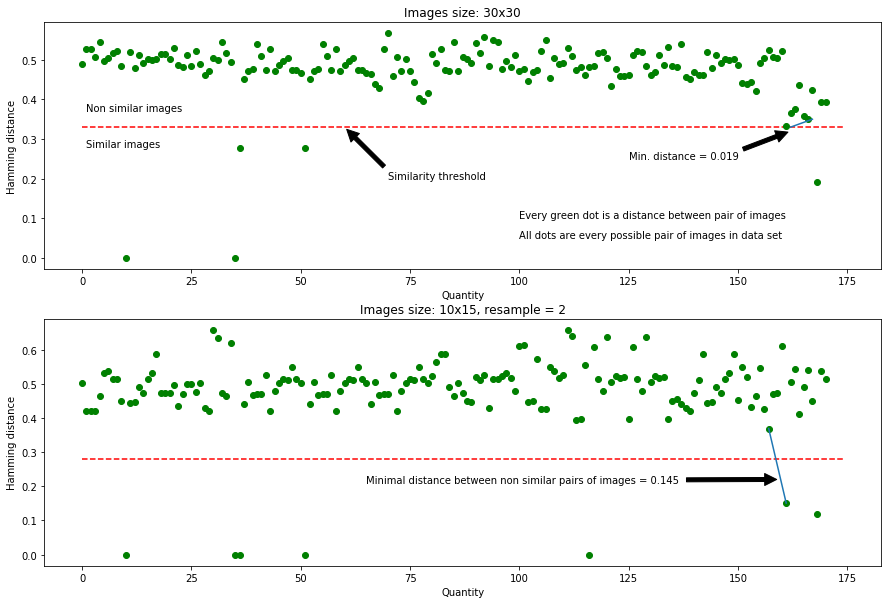

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

hamm_data_30x30 = []
with open('w_data_30x30.csv', 'r') as f:
    for line in f:
        hamm_data_30x30.append(float(line[:-1]))
        
hamm_data_w_data_10x15_res_2 = []
with open('w_data_10x15_res_2.csv', 'r') as f:
    for line in f:
        hamm_data_w_data_10x15_res_2.append(float(line[:-1]))
        

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot([0.33]*175, 'r--',hamm_data_30x30, 'go', [162,167],[0.33,0.35] )
plt.xlabel('Quantity')
plt.ylabel('Hamming distance')
plt.title('Images size: 30x30')
plt.annotate('Similarity threshold', xy=(60, 0.33), xytext=(70, 0.2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Min. distance = 0.019', xy=(162, 0.32), xytext=(125, 0.25), arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(100, 0.1, 'Every green dot is a distance between pair of images')
plt.text(100, 0.05, 'All dots are every possible pair of images in data set')
plt.text(1, 0.28, 'Similar images')
plt.text(1, 0.37, 'Non similar images')

plt.subplot(212)
plt.plot([0.28]*175, 'r--',hamm_data_w_data_10x15_res_2, 'go', [161,  157], [0.151, 0.369])    #[52, 163], [0.265, 0.41])     #[0.265, 37], [0.41, 163])
plt.xlabel('Quantity')
plt.ylabel('Hamming distance')
plt.title('Images size: 10x15, resample = 2')
plt.annotate('Minimal distance between non similar pairs of images = 0.145', xy=(160, 0.22), xytext=(65, 0.21), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Further development

Although the script is capable of finding all duplicates and similar images in test data set further testing on a larger data set is required for improving algorithm accuracy.

Some kinds of image modification that aren't provided in the data set may not be recognizable by the script.

Therefore, future research is necessary for finding others suitable algorithms for the task, merging them together to improve accuracy of this tool.

Links:
- https://github.com/moondra2017/Computer-Vision
- https://en.wikipedia.org/wiki/Hamming_distance
- http://ml-school.railsreactor.com/